In [1]:
# Pandas is used for data manipulation
import pandas as pd

In [2]:
# Read in data and display first 5 rows
features = pd.read_csv('bcd.csv')
features.head(5)

,sr_no,lump_hard,swollen_area,change_size,discolouring,pain,nipple_inwards,nipple_discharge,increasing_weight,unhealthy_diet,...,alcohol,exposure_estrogen,contraceptive,stress,Age,Family_history,Personal_history,Radiation,Pregnancy,prone
0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,2,0,0,0,1,1
1,2,1,1,1,0,0,0,0,1,1,...,1,0,0,0,2,1,0,0,0,1
2,3,1,0,1,0,1,0,0,0,0,...,0,0,0,1,2,0,0,0,0,1
3,4,1,1,1,1,0,1,1,0,0,...,1,0,0,0,2,0,0,0,0,1
4,5,1,1,1,0,1,0,0,1,0,...,0,0,0,0,2,0,0,0,1,1


In [3]:
print('The shape of our features is:', features.shape)

The shape of our features is: (121, 21)


In [4]:
# Descriptive statistics for each column
features.describe()

,sr_no,lump_hard,swollen_area,change_size,discolouring,pain,nipple_inwards,nipple_discharge,increasing_weight,unhealthy_diet,...,alcohol,exposure_estrogen,contraceptive,stress,Age,Family_history,Personal_history,Radiation,Pregnancy,prone
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,0.421488,0.371901,0.413223,0.338843,0.404959,0.363636,0.280992,0.446281,0.438017,...,0.446281,0.338843,0.338843,0.479339,2.256198,0.322314,0.363636,0.305785,0.314050,0.578512
std,35.073732,0.495851,0.485322,0.494460,0.475284,0.492925,0.483046,0.451352,0.499173,0.498206,...,0.499173,0.475284,0.475284,0.501650,0.724901,0.469306,0.483046,0.462655,0.466066,0.495851
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,121.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Use numpy to convert to arrays
import numpy as np

In [6]:
# Labels are the values we want to predict
labels = np.array(features['prone'])

In [7]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('prone', axis = 1)
features= features.drop('sr_no', axis = 1)

In [8]:
# Saving feature names for later use
feature_list = list(features.columns)

In [9]:
# Convert to numpy array
features = np.array(features)

In [10]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [11]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (90, 19)
Training Labels Shape: (90,)
Testing Features Shape: (31, 19)
Testing Labels Shape: (31,)


In [13]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [14]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [15]:
# Train the model on training data
rf.fit(train_features, train_labels);

In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [17]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [18]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.24 degrees.


In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
def print_scores(m):
    res = [roc_auc_score(train_labels,m.predict_proba(train_features)[:,1])]
    for r in res:
        print(r)


In [20]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10)
rf.fit(train_features,train_labels)
print_scores(rf)

0.9819004524886878


In [20]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [21]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [22]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [23]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [25]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

In [26]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [27]:
# Write graph to a png file
graph.write_png('tree.png')

FileNotFoundError: [WinError 2] "dot" not found in path.

In [28]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

FileNotFoundError: [WinError 2] "dot" not found in path.

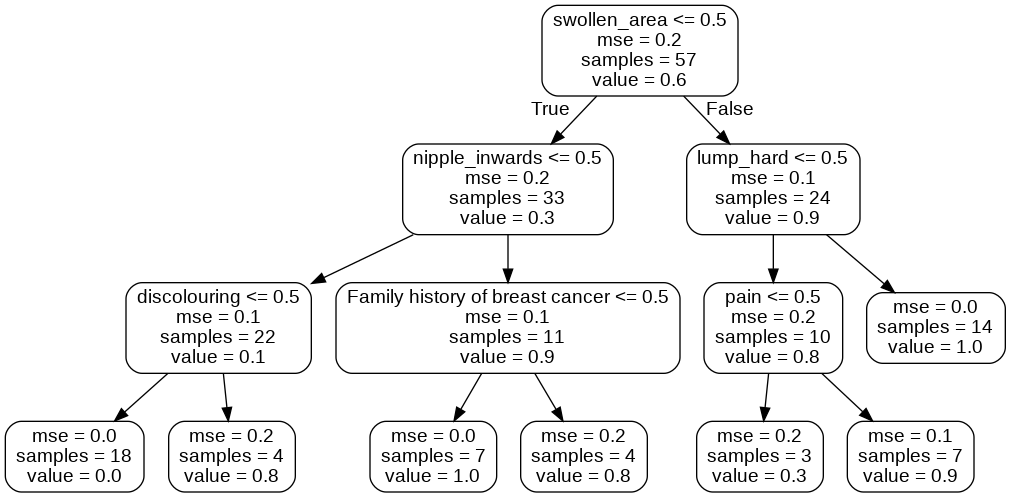

In [29]:
from IPython.display import Image
Image('small_tree.png')

In [24]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: nipple_inwards       Importance: 0.26
Variable: lump_hard            Importance: 0.14
Variable: swollen_area         Importance: 0.11
Variable: change_size          Importance: 0.1
Variable: pain                 Importance: 0.09
Variable: discolouring         Importance: 0.06
Variable: Family_history       Importance: 0.04
Variable: alcohol              Importance: 0.03
Variable: increasing_weight    Importance: 0.02
Variable: unhealthy_diet       Importance: 0.02
Variable: not_exercise         Importance: 0.02
Variable: contraceptive        Importance: 0.02
Variable: Age                  Importance: 0.02
Variable: Personal_history     Importance: 0.02
Variable: nipple_discharge     Importance: 0.01
Variable: exposure_estrogen    Importance: 0.01
Variable: stress               Importance: 0.01
Variable: Radiation            Importance: 0.01
Variable: Pregnancy            Importance: 0.01


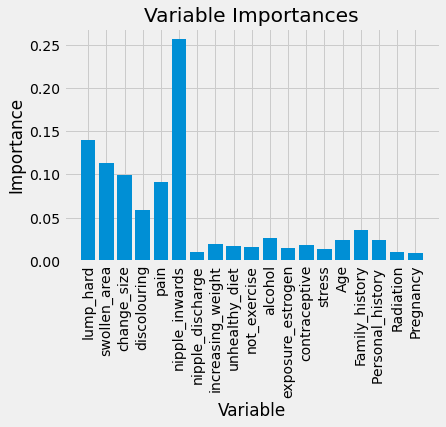

In [25]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [26]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
filename = 'finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [27]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

https://www.kaggle.com/vanditharai/pcod-feature-extraction-using-insulin-levels

**Breast Cancer Symptoms**: https://cc3.cancercenter.com/alt/cancer-types/breast-cancer/symptoms?invsrc=non_branded_natural_search_google

**Official dataset (permission required)** : https://cdas.cancer.gov/datasets/plco/19/